In [10]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error , r2_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import math

In [6]:

data2 = pd.read_csv('Breast_cancer_data.csv')
X2 = data2.drop('diagnosis', axis=1)
y2 = data2['diagnosis']

In [7]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [8]:
#Build Random Forest Classifier without Feature Selection
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_test2)

# Calculate Accuracy
acc_no_selection2 = accuracy_score(y_test2, y_pred2)
print("Accuracy without Feature Selection on Dataset 2:", acc_no_selection2)

Accuracy without Feature Selection on Dataset 2: 0.9473684210526315


In [13]:
# Perform Feature Selection
feature_imp2 = pd.Series(clf2.feature_importances_, index=X2.columns).sort_values(ascending=False)
selected_features2 = feature_imp2[feature_imp2 > 0.2].index  # Example threshold for selection

# Build Random Forest Classifier with Feature Selection
clf_selected2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_selected2.fit(X_train2[selected_features2], y_train2)
y_pred_selected2 = clf_selected2.predict(X_test2[selected_features2])

# Calculate Accuracy
acc_with_selection2 = accuracy_score(y_test2, y_pred_selected2)
print("Accuracy with Feature Selection on Dataset 2:", acc_with_selection2)

Accuracy with Feature Selection on Dataset 2: 0.8771929824561403


<Axes: >

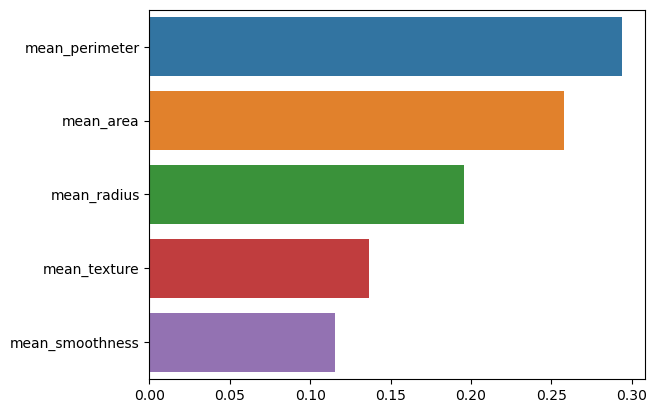

In [14]:
sns.barplot(x=feature_imp2, y=feature_imp2.index)